# MBTI-Personality-Type-Prediction

Prediction of person’s personality type based on some posts they have written.

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

Introversion (I) – Extroversion (E) Intuition (N) – Sensing (S) Thinking (T) – Feeling (F) Judging (J) – Perceiving (P)

This dataset contains over 8600 rows of data, on each row is a person’s

Dataset Source : https://github.com/dashascience/-MBTI-Myers-Briggs-Personality-Type-Dataset

### Import Dataset

In [3]:
import os,urllib
url = 'https://raw.githubusercontent.com/dashascience/-MBTI-Myers-Briggs-Personality-Type-Dataset/master/mbti_1.csv'
os.mkdir('data')
urllib.request.urlretrieve(url, os.path.join('data', 'mbti.csv'))


('data\\mbti.csv', <http.client.HTTPMessage at 0x21ad6112640>)

### Load Dataset

In [2]:
import sklearn
import pandas as pd
import numpy as np

df = pd.read_csv(os.path.join('data', 'mbti.csv'))
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


## Exploratory Data Analysis (EDA)

In [11]:
df.isna().sum()

type     0
posts    0
dtype: int64

In [6]:
df.head(3)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...


In [3]:
import re

def string_cond(s):
  return (
      'http' not in s and re.search('[a-zA-Z]', s) and len(s) >= 15
  )

sentence = []

for x in df.iterrows():
  for s in x[1]['posts'].split('|||'):
    if string_cond(s):
      sentence.append((x[1]['type'], s))

df_new = pd.DataFrame(sentence, columns=['type', 'post'])
filter_chars = '[!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n]'
df_new['post'] = df_new['post'].map(lambda x : re.sub(filter_chars, "", x))
df_new.describe()

,type,post
count,383993,383993
unique,16,382185
top,INFP,Welcome to the forum
freq,80613,75


In [29]:
df_new['type'].value_counts()

INFP    80613
INFJ    65748
INTP    57492
INTJ    47895
ENTP    31018
ENFP    30280
ISTP    14770
ISFP    11446
ENTJ    10331
ISTJ     8879
ENFJ     8578
ISFJ     7342
ESTP     3934
ESFP     1979
ESFJ     1921
ESTJ     1767
Name: type, dtype: int64

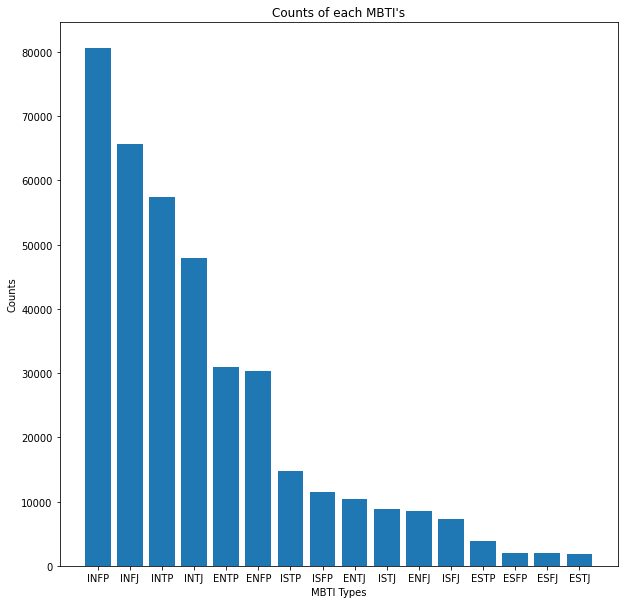

In [30]:
import matplotlib.pyplot as plt

count = df_new['type'].value_counts()

plt.figure(figsize = (10, 10))
plt.bar(count.keys(), count.values)

plt.xlabel("MBTI Types")
plt.ylabel("Counts")
plt.title("Counts of each MBTI's")
plt.show()

Insight 1 : The Dataset is highly Imbalanced





In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')
X = vectorizer.fit_transform(df_new['post'].values)
X.shape

(383993, 149553)

In [10]:

for x in df_new['type'].unique() :
    tokens  = vectorizer.transform(df_new['post'].loc[df_new['type'] == x].values)
    counts = tokens.sum(axis=0)
    words = vectorizer.inverse_transform(np.asarray(counts))
    print(f"\nThe most Frequent Words of {x}: ")
    print(words)
    


The most Frequent Words of INFJ: 
[array(['00', '000', '004200', ..., '안녕하세요', '유재석yoo', 'ｃｙｂｅｒｐｕｎｋ'],
      dtype='<U200')]

The most Frequent Words of ENTP: 
[array(['00', '000', '006', ..., 'ﾉヮﾉ', 'ﾉﾟ', 'ﾟﾉ'], dtype='<U200')]

The most Frequent Words of INTP: 
[array(['00', '000', '0000', ..., '我喜爱冬天', '我很高兴', '関西弁'], dtype='<U200')]

The most Frequent Words of INTJ: 
[array(['00', '000', '000000', ..., '陰陽', '龍が如くu3000known', 'ﾟﾟ'],
      dtype='<U200')]

The most Frequent Words of ENTJ: 
[array(['001', '0060', '0100', ..., '就拿我', '我才不像你一把吞大笑', '我是你的'],
      dtype='<U200')]

The most Frequent Words of ENFJ: 
[array(['00', '00000011', '000000111', ..., 'ｔｒｕｍｐu3000ｉｓu3000ａｎu3000ｅｓｔｐ',
       'ｖａｐｏｒｗａｖｅ',
       'ｗｈｙu3000ｉｓu3000ａｎｙｏｎｅu3000ｓｔｉｌｌu3000ｄｉｓｃｕｓｓｉｎｇu3000ｔｈｉｓ'],
      dtype='<U200')]

The most Frequent Words of INFP: 
[array(['00', '000', '0001', ..., '我学习汉语但是不太容易呢', '砂月', 'ﾉｼ'],
      dtype='<U200')]

The most Frequent Words of ENFP: 
[array(['00', '000', '001', ..., 'ｅｘａｃ

Insight 2 : A lot of numbers and non-alphabetical words

EDA Summary :
1. UnderSample / OverSample the imbalanced dataset
2. Transform the dataset : remove non ascii characters
3. Create tokenizer specialized for numbers